## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=bools)

In [15]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""

results = {}
bools=[True, False]
for i in bools:
    keras.backend.clear_session() # 把舊的 Graph 清掉

    model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=bools)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt]
             )
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    model = keras.models.load_model("./tmp.h5")
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    exp_name_tag = "monitor={}".format(i)
    results[exp_name_tag]={'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc,
                          'loss_loadback':loss_loadback,
                          'acc_loadback':acc_loadback}
    
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 7s 135us/step - loss: 0.5629 - accuracy: 0.8354 - val_loss: 1.6236 - val_accuracy: 0.4930
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.5463 - accuracy: 0.8413 - val_loss: 1.6117 - val_accuracy: 0.4885
Epoch 48/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.5290 - accuracy: 0.8463 - val_loss: 1.6336 - val_accuracy: 0.4913
Epoch 49/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.5141 - accuracy: 0.8532 - val_loss: 1.6667 - val_accuracy: 0.4843
Epoch 50/50
10000/10000 [==============================] - 2s 156us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376

Epoch 41/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.6495 - accuracy: 0.8000 - val_loss: 1.5475 - val_accuracy: 0.4952
Epoch 42/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.6317 - accuracy: 0.8074 - val_loss: 1.5787 - val_accuracy: 0.4937
Epoch 43/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.6141 - accuracy: 0.8153 - val_loss: 1.5601 - val_accuracy: 0.4954
Epoch 44/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.5953 - accuracy: 0.8212 - val_loss: 1.6004 - val_accuracy: 0.4881
Epoch 45/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.5795 - accuracy: 0.8278 - val_loss: 1.5992 - val_accuracy: 0.4966
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.5602 - accuracy: 0.8358 - val_loss: 1.6264 - val_accuracy: 0.4889
Epoch 47/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.5454 - accuracy: 0.8406

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

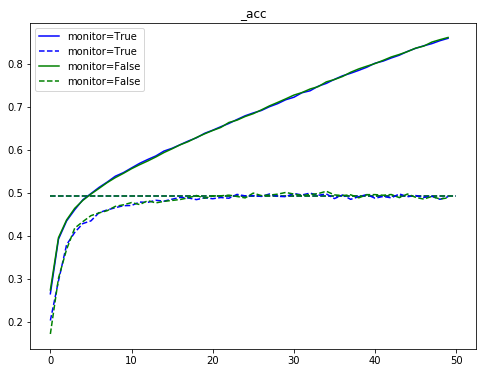

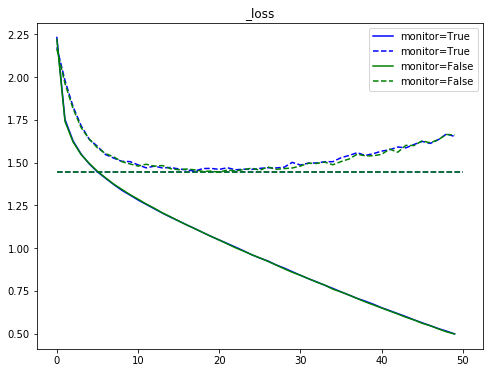

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors=color_bar[i], linestyles='--')
    plt.title("_acc")
    plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors=color_bar[i], linestyles='--')
    plt.title("_loss")
    plt.legend()
plt.show()